# Read & Clear Data

In [2]:
import numpy as np
import pandas as pd
# import feather 
import matplotlib.pyplot as plt  
from time import time
from mailerWithUtf8 import mail
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import os

In [3]:
def save_dataframe(df, out_filename):
   # write to csv and no index
    t0 = time()
    df.to_csv(out_filename + ".csv", index=False, encoding='utf-8')
#     df.to_csv(out_filename + ".csv", encoding='utf-8')
    print("time for output csv file: %.2f" % (time()-t0))

In [4]:
start_time = time()
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
# filename = '0713_april_marketing_anylze_full_table_group12_select_max_min.feather' 
# filename = "0725_april_marketing_anylze_select_294_table_group11_max_min_sample_adult_others_1.csv"
filename = "0729_marketing_with_picked_group11_numeric_max_min.csv"

# train_df = feather.read_dataframe(path + filename)
train_df = pd.read_csv(path + filename, error_bad_lines=False)

print('load csv %s seconds', format(time() - start_time))

load csv %s seconds 51.90227675437927


In [7]:
train_df = train_df[train_df['Groups'] != 'Infrequent_User']
test_df = test_df[test_df['Groups'] != 'Infrequent_User']


In [8]:
# train_df = train_df[wants_col]
# test_df = test_df[wants_col]

In [563]:
CLASSIFIER = "RANDOM_FOREST"
CURRENT_MODE = "all_294_no_infrequent"


In [564]:
groups = train_df["Groups"].unique()

In [565]:
out_filename = CLASSIFIER + "_" + CURRENT_MODE + '_'

In [566]:
out_path = "clf_random_forest_model_kFold/" + CURRENT_MODE +"/"
if not os.path.exists(out_path):
    os.makedirs(out_path)

In [567]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [568]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

# convert y to numeric# 

In [569]:
le = preprocessing.LabelEncoder()
le.fit(train_df["Groups"].unique())
train_numeric_y = le.transform(train_y)


In [570]:
test_numeric_y = le.transform(test_y) 

# build Random Forest Classifier


In [571]:
start_time = time()


In [572]:
rf = RandomForestClassifier(max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1,
                            n_estimators = 100)



In [573]:
param_grid = {"criterion" : ["gini"], 
              "min_samples_leaf" : [10], 
              "min_samples_split" : [2],
#               "max_depth" : [10],
              "n_estimators": [100]}

In [574]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_clf = gs.fit(train_x, train_numeric_y)

In [575]:
gs.cv_results_

{'mean_fit_time': array([ 43.98299356]),
 'mean_score_time': array([ 0.16564212]),
 'mean_test_score': array([ 0.6739953]),
 'mean_train_score': array([ 0.87486766]),
 'param_criterion': masked_array(data = ['gini'],
              mask = [False],
        fill_value = ?),
 'param_min_samples_leaf': masked_array(data = [10],
              mask = [False],
        fill_value = ?),
 'param_min_samples_split': masked_array(data = [2],
              mask = [False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [100],
              mask = [False],
        fill_value = ?),
 'params': ({'criterion': 'gini',
   'min_samples_leaf': 10,
   'min_samples_split': 2,
   'n_estimators': 100},),
 'rank_test_score': array([1]),
 'split0_test_score': array([ 0.67749954]),
 'split0_train_score': array([ 0.87362328]),
 'split1_test_score': array([ 0.71150394]),
 'split1_train_score': array([ 0.87704277]),
 'split2_test_score': array([ 0.71270082]),
 'split2_train_score': array([ 0.88177

In [576]:
clf = grid_clf.best_estimator_

# saving classifier

In [577]:
# joblib.dump(clf, out_path + out_filename + 'CLF.pkl') 
# clf = joblib.load('filename.pkl') 


In [578]:
clf_info = str(("Accuracy on training set: %f" % grid_clf.score(train_x, train_numeric_y))) + '\n'
# clf_info += str(("Accuracy on test set: %f" % clf.score(test_x, test_numeric_y))) + '\n'
clf_info += str(('fit time %s seconds' % format(time() - start_time))) + '\n'
print(clf_info)

Accuracy on training set: 0.873664
fit time 63.787816286087036 seconds



In [579]:
# predict_y = clf.predict(test_x)

In [580]:
# predict_y 

In [581]:
# test_numeric_y

# get feature importances

In [582]:
important_dict = dict(zip(train_df.columns[:-1],clf.feature_importances_))

In [583]:
important_dict

{'ACTV_CHANNEL_NAME': 0.0074861506092538718,
 'ACTV_TYPE': 0.0015609035908949456,
 'AGE': 0.0077521682150206205,
 'AGENCY_AMT': 0.0029010338818132668,
 'AGENCY_FLAG': 0.00082367159178643788,
 'ANOTHER_ACTIVE_D': 2.2927984333288877e-06,
 'ANOTHER_ACTIVE_VD': 7.3513510047195803e-05,
 'APPLY_CURR_EBILL_SBILL_FLAG': 0.0014102344484005032,
 'AUTOPAY_IND': 0.0010039748265157286,
 'AVG_HS_USE_MONTH': 0.0,
 'AVG_HS_USE_MONTH_EX_CURR': 0.0,
 'BEST_DRP_DESC': 0.00058609397790209859,
 'BEST_VRP_DESC': 0.0002327985303986753,
 'BILL_CITY_NAME': 0.0054704897238107651,
 'BILL_DISTRICT_NAME': 0.0092890615709019051,
 'BL_CYCLE_DESC': 0.0042763408574427062,
 'BONDING_FLAG': 0.0014262749312580348,
 'BOOSTER_AMT': 4.2817537426205155e-06,
 'CCI_CHG_DATE': 0.0,
 'CHANNEL_CHURN_INDEX': 0.0001238971167121388,
 'CHURN_CLM_IND': 0.00058194380567652302,
 'CHURN_IND': 1.2753128600149037e-05,
 'CHURN_INDEX': 9.1043629660691631e-05,
 'CHURN_TYPE': 1.6208507731527867e-05,
 'CHURN_WELCOME_STAGE': 7.6272429150332557e-

In [584]:
important_list = sorted(important_dict.items(), key=lambda x: x[1])

In [585]:
important_list.reverse()

In [586]:
clf_info += '\n\nFeature Importances\n===================\n'
for row in important_list:
    clf_info += str(row) + "\n"
    print(str(row))

('GENDER_CODE', 0.065040098707832325)
('DATA_USAGE_MB', 0.027767078780946437)
('P3M_AVG_DATA_USAGE_MB', 0.027397049671188275)
('P6M_AVG_DATA_USAGE_MB', 0.026149032867310837)
('IMEI_MKT_NAME', 0.025795472683094553)
('IMEI_SMART_OS_FLAG', 0.025779829536125513)
('L3M_AVG_VAS_MB', 0.025221150569171753)
('DATA_RATING_USAGE_MB', 0.024823423283123813)
('IMEI_MFG_NAME', 0.02260504471109015)
('L6M_AVG_VAS_MB', 0.021174211438888185)
('L1M_DATA_USAGE_MB', 0.019549569930392113)
('L3M_DATA_USAGE_MB', 0.0181395463217735)
('L2M_DATA_USAGE_MB', 0.015594624851703992)
('TENURE_SCV', 0.0094517544119381118)
('BILL_DISTRICT_NAME', 0.0092890615709019051)
('P6M_MO_OFFNET_DUR', 0.0085629549585978289)
('P3M_MO_OFFNET_DUR', 0.0082861508536834078)
('MT_STM_AMT', 0.0082637892591062648)
('MT_TTL_DURATION', 0.008230169360729081)
('P6M_MO_PSTN_DUR', 0.008211680499972002)
('P3M_MO_PSTN_DUR', 0.008170128099015463)
('MOST_MT_DUR', 0.008106927652095015)
('L3M_AVG_NET_INV_AMT', 0.0080555461596374407)
('CURR_DEVICE_MODEL'

In [589]:
feature_df = pd.DataFrame(important_list, columns = ["COLUMN", "IMPORTANT_VALUE"])

In [590]:
t0 = time()
feature_df.to_csv(out_path + out_filename + "feature_important_descent.csv", index=False)
print("time for output csv file: %.2f" % (time()-t0))

time for output csv file: 0.00


In [591]:
# cpy_dict = dict(important_list)
# cpy_dict["Groups"] = target_groups
# feature_df = pd.DataFrame(cpy_dict, index = [0])

In [592]:
# cpy_dict = dict(important_list)
# # cpy_dict["Groups"] = target_groups
# feature_df = pd.DataFrame(cpy_dict, index = [0])

In [593]:
# t0 = time()
# feature_df.to_csv(out_path + out_filename + "feature_important_one_row.csv", index=False)
# print("time for output csv file: %.2f" % (time()-t0))

In [594]:
clf.n_classes_

2

In [595]:
clf.n_outputs_

1

In [596]:
predict_y = clf.predict(train_x)

In [597]:
# cnf_matrix = confusion_matrix(test_numeric_y, predict_y )
cnf_matrix = confusion_matrix(train_numeric_y, predict_y )
cnf_matrix

array([[48390,  5919],
       [ 7803, 46503]])

In [598]:
group_encoder = []
for idx, row in enumerate(cnf_matrix):
#     success predict
#     print(row[idx])
    current_group = str(le.inverse_transform(idx))
    group_encoder.append(current_group)
#     current_group = groups[idx]

    print(current_group)

#     idx_count_in_group = len(test_df[test_df["Groups"] == current_group])
    idx_count_in_group = len(train_df[train_df["Groups"] == current_group])

    clf_info +=  "\n\n" + str("class = %s count = [%s / %s]" % (current_group, row[idx], idx_count_in_group))
    clf_info +=  "\n\n" + str("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print("class = %s count = [%s / %s]" % (current_group,row[idx],str(idx_count_in_group)))
    print("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print()

Adult
class = Adult count = [48390 / 54309]
predict Adult accurancy = 0.891012539358

Others
class = Others count = [46503 / 54306]
predict Others accurancy = 0.856314219423



In [599]:
cnf_df = pd.DataFrame(cnf_matrix)
cnf_df.columns = group_encoder
cnf_df.index = group_encoder

In [600]:
cnf_df

,Adult,Others
Adult,48390,5919
Others,7803,46503


In [601]:
cnf_df.to_csv(out_path + out_filename + "confusion_matrix.csv", index=False)


In [602]:
md_info = clf_info.replace("\n", "<br>")
with open(out_path + out_filename + 'readme.md', 'w+') as f:
     f.write(md_info)
f.closed

True

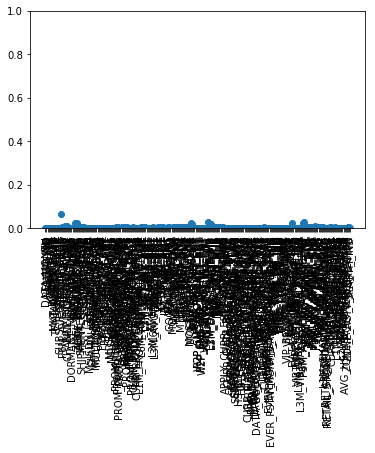

In [603]:
plt.plot(clf.feature_importances_, 'o')  
# for i in 
plt.xticks(range(train_x.shape[1]), train_df.columns[:-1], rotation=90)  
plt.ylim(0, 1)  
plt.show()  

In [604]:
from winsound import Beep
Beep(440, 500) 
Beep(440, 500) 

In [287]:
from mailerWithUtf8 import mail
mail_info = clf_info.replace("\n", "<br>")
test=mail()
test.main("clf_info finished", mail_info)

Start Send Mail
User Email : aa26365566@gmail.com - DONE 
Finish Send Mail


# Check feature importances accurancy

In [240]:
feature_cols = []
limit_importances = 5
for idx, feature in enumerate(important_list):
    if(idx == limit_importances):
        break

    #     print(feature[0])
    feature_cols.append(feature[0])
feature_cols.append("Groups")

In [241]:
feature_cols

['GENDER_CODE',
 'P3M_AVG_DATA_USAGE_MB',
 'DATA_USAGE_MB',
 'IMEI_MKT_NAME',
 'DATA_RATING_USAGE_MB',
 'Groups']

In [242]:
feature_train_x = train_df[feature_cols].iloc[:, 0:-1].values
feature_test_x = test_df[feature_cols].iloc[:, 0:-1].values

NameError: name 'test_df' is not defined

In [ ]:
gs_feature = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_feature_clf = gs_feature.fit(feature_train_x, train_numeric_y)

In [ ]:
clf_feature = grid_feature_clf.best_estimator_
clf_feature_info = str(("Accuracy on training set: %f" % clf_feature.score(feature_train_x, train_numeric_y))) + '\n'
clf_feature_info += str(("Accuracy on test set: %f" % clf_feature.score(feature_test_x, test_numeric_y))) + '\n'
clf_feature_info += str(('fit time %s seconds' % format(time() - start_time))) + '\n'
clf_feature_info += str(('feature selection numbers = %s' % str(limit_importances) + '\n'

print(clf_feature_info)

In [ ]:
predict_feature_y = clf_feature.predict(feature_test_x)

In [ ]:
cnf_matrix = confusion_matrix(test_numeric_y, predict_feature_y )
cnf_matrix

In [ ]:
group_encoder = []
for idx, row in enumerate(cnf_matrix):
#     success predict
#     print(row[idx])
    current_group = str(le.inverse_transform(idx))
    group_encoder.append(current_group)
#     current_group = groups[idx]

    print(current_group)

    idx_count_in_group = len(test_df[test_df["Groups"] == current_group])
    clf_feature_info +=  "\n\n" + str("class = %s count = [%s / %s]" % (current_group, row[idx], idx_count_in_group))
    clf_feature_info +=  "\n\n" + str("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print("class = %s count = [%s / %s]" % (current_group,row[idx],str(idx_count_in_group)))
    print("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print()

In [ ]:
cnf_pd = pd.DataFrame(cnf_matrix)
cnf_pd.columns = group_encoder
cnf_pd.index = group_encoder

In [ ]:
cnf_pd

In [ ]:
from winsound import Beep
Beep(440, 500) 
Beep(440, 500) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000) 
Beep(659, 500) 
Beep(659, 500) 
Beep(659, 500) 
Beep(698, 350) 
Beep(523, 150) 
Beep(415, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000)